In [1]:
import json
import os
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np

In [2]:
STORAGE_ROOT_DIR = "/home/nigiva/git/lopilo-trainer/data"
DATASET_DIR = "sample/extern"
DATASET_FILE = "corentin_renault_20000_record_controller.eslr"
DATASET_PATH = os.path.join(STORAGE_ROOT_DIR, DATASET_DIR, DATASET_FILE)

# Analyser le (angle, throttle) envoyé par le serveur avec celui enregistré par le controller

In [40]:
id_data = []
simulator_data = []
user_data = []

with open(DATASET_PATH, "r") as dataset_file:
    for i, line in enumerate(tqdm(dataset_file)):
        data_line = json.loads(line)
        if data_line['msg_type'] == "telemetry":
            id_data.append(i)
            simulator_data.append([data_line['steering_angle'], data_line['throttle']])
            user_data.append([data_line['user_angle'], data_line['user_throttle']])
            if i == 1000:
                break

id_data = np.array(id_data)  
simulator_data = np.array(simulator_data)
user_data = np.array(user_data)  

1000it [00:00, 19369.47it/s]


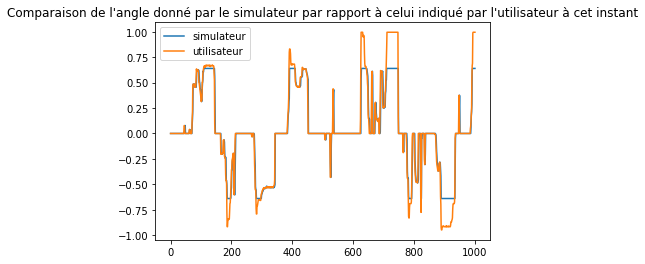

In [41]:
plt.plot(id_data, simulator_data[:,0], label="simulateur")
plt.plot(id_data, user_data[:,0], label="utilisateur")
plt.title("Comparaison de l'angle donné par le simulateur par rapport à celui indiqué par l'utilisateur à cet instant")
plt.legend()
plt.show()

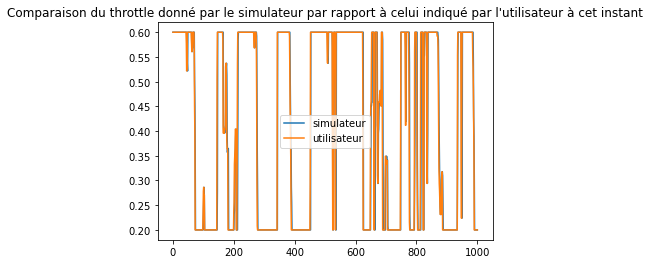

In [42]:
plt.plot(id_data, simulator_data[:,1], label="simulateur")
plt.plot(id_data, user_data[:,1], label="utilisateur")
plt.title("Comparaison du throttle donné par le simulateur par rapport à celui indiqué par l'utilisateur à cet instant")
plt.legend()
plt.show()

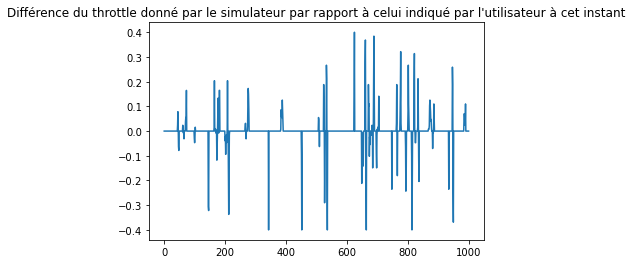

In [43]:
plt.plot(id_data, simulator_data[:,1] - user_data[:,1])
plt.title("Différence du throttle donné par le simulateur par rapport à celui indiqué par l'utilisateur à cet instant")
plt.show()

In [ ]:
plt.plot(id_data, simulator_data[:,0] - user_data[:,0])
plt.title("Différence du angle donné par le simulateur par rapport à celui indiqué par l'utilisateur à cet instant")
plt.show()

# Analyse de la répartition de la speed

In [10]:
DATASET_FILE_1 = "corentin_renault_4490_rc_thr0.3_auto_corr.eslr"
DATASET_PATH_1 = os.path.join(STORAGE_ROOT_DIR, DATASET_DIR, DATASET_FILE_1)

DATASET_FILE_2 = "corentin_renault_5342_rc_thr0.5.eslr"
DATASET_PATH_2 = os.path.join(STORAGE_ROOT_DIR, DATASET_DIR, DATASET_FILE_2)

In [24]:
#angle, throttle, speed
data = []

In [25]:
def read_file_and_add_in_data(path):
    with open(path, "r") as dataset_file:
        for i, line in enumerate(tqdm(dataset_file)):
            data_line = json.loads(line)
            if data_line['msg_type'] == "telemetry":
                angle = data_line['user_angle']
                throttle = data_line['user_throttle']
                speed = data_line['speed']
                data_tuple = [angle, throttle, speed]
                data.append(data_tuple)

In [47]:
data = []
read_file_and_add_in_data(DATASET_PATH)
read_file_and_add_in_data(DATASET_PATH_1)
read_file_and_add_in_data(DATASET_PATH_2)

20032it [00:00, 31397.13it/s]
4490it [00:00, 32624.72it/s]
5342it [00:00, 32624.15it/s]


In [48]:
data = np.array(data)

(array([  14.,   23.,  100., 2209., 8810., 7645., 5098., 2585., 2081.,
        1299.]),
 array([ 1.41243 ,  2.450359,  3.488288,  4.526217,  5.564146,  6.602075,
         7.640004,  8.677933,  9.715862, 10.753791, 11.79172 ]),
 <BarContainer object of 10 artists>)

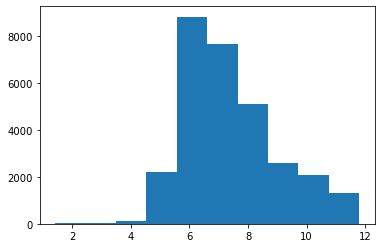

In [49]:
plt.hist(data[:,2])

## Fusionner plusieurs fichiers .eslr

In [52]:
def read_and_append_file(path, f):
    with open(path, "r") as dataset_file:
        for i, line in enumerate(tqdm(dataset_file)):
            data_line = json.loads(line)
            if data_line['msg_type'] == "telemetry":
                f.write(line)

In [53]:
with open("corentin_renault_30000_mix_rc.eslr", "w") as f:
    read_and_append_file(DATASET_PATH, f)
    read_and_append_file(DATASET_PATH_1, f)
    read_and_append_file(DATASET_PATH_2, f)

20032it [00:00, 25286.81it/s]
4490it [00:00, 25081.01it/s]
5342it [00:00, 25816.57it/s]
